# 딥러닝과 영상 인식  
  
컨볼루션 신경망(CNN: Convolutional Neural Network)  
• 영상 인식 등을 위한 딥러닝에 특화된 네트워크 구조  
• CNN의 목적은 첫 번째는 특성 추출이고 두 번째는 추출 된 모든 특성을 집계하고이를 기반으로 예측하는 것  
• 일반적 구성: 컨볼루션(convolution) + 풀링(pooling) + … + 완전 연결 레이어(FC)  
  
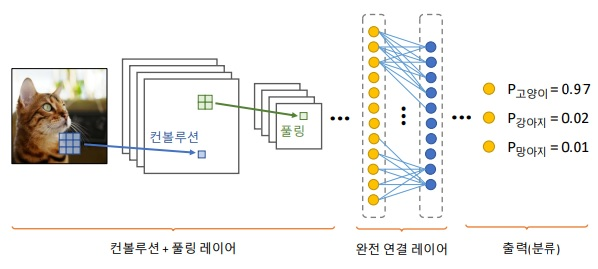  
  
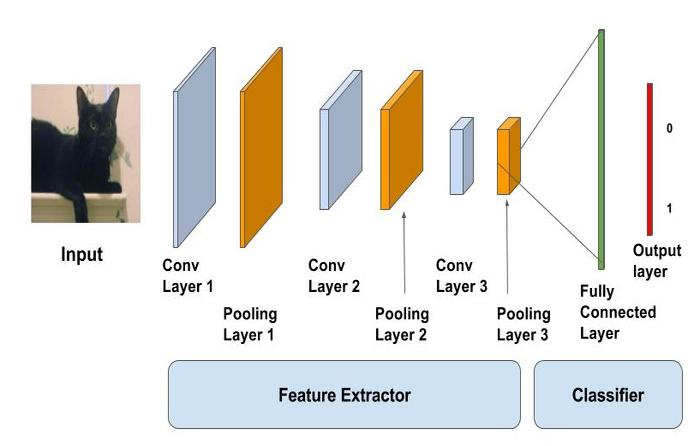
  
컨볼루션 레이어(Convolution Layer)  
• 2차원 영상에서 유효한 특징(feature)를 찾아내는 역할  
• 연산의 주요 목적은 입력 이미지에서 가장자리, 곡선, 모서리, 그라데이션 방향 등과 같은 특징을 추출  
• 입력 이미지의 모든 수평 및 수직 가장자리를 추출  
• 유용한 필터 마스크가 학습에 의해 결정됨  
• 보통 ReLU 활성화 함수를 함께 사용함  
  
  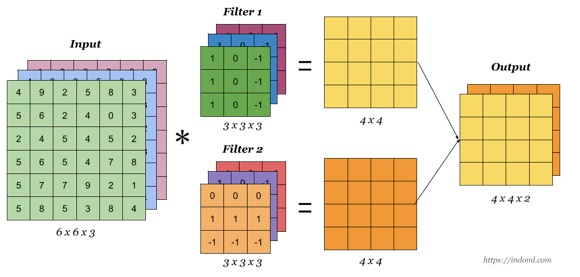  
  
입력 크기 : 6 * 6 * 3        
필터 크기 : 3 * 3 * 3(입력 깊이 = 3이므로 필터 깊이도 3)  
필터 개수 : 2  
한 필터의 가중치 = 3 * 3 * 3 = 27  
총 가중치 = 27 * 2 = 54  
  
가중치 값은 임의의 값으로 초기화되며 모든 학습 단계에서 계속 조정.  
  
출력 맵 차수계산  
입력(n * n), 필터(f, f)이면  
출력차수 = (n - f + 1)  
예> 입력(6 * 6), 필터(3, 3)이면 6-3+1=4 이므로  
출력차수 = 4 * 4  
  
패딩 모드  
valid: 패딩이 추가되지 않아 출력 맵 축소됨.  
same: 패딩 추가. 출력 맵의 크기가 입력과 동일.  
  
stride  
이동거리: 보통 1. 1보다 크면 출력 맵 크기 축소됨. 정보누락. 메모리, 시간 절약됨  
  
출력 맵 차수 계산 공식  
입력(n), 필터(f), 패딩(p), stride(s)  
=> (n+2p-f/s+1) * (n+2p-f/s+1)  
  
입력(n) = (6x6), 필터(f) = (3x3), 패딩(p) = 1, stride(s) = 1 이면   
=>  
(6 + 2 * 1 – 3) / 1 + 1 = 6  
출력차수 = 6 x 6  
   
입력(n) = (7x7), 필터(f) = (3x3), 패딩(p) = 1, stride(s) = 2 이면   
=>   
(7 + 2 * 1-3) / 2 = 4  
출력차수 = 4 x 4  
  
  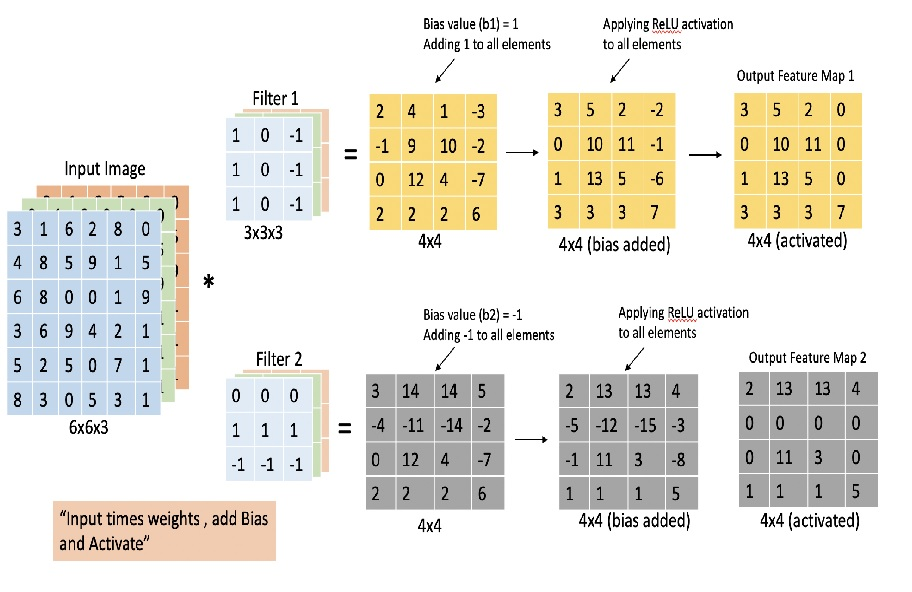  
  
출력 맵의 16개의 모든 요소에 바이어스를 더해주고, 활성화 함수 ReLU 적용.  
비선형 모델로 변환하고 양수 결과는 같은 값을 반환하고 음수는 0을 반환  
첫 번째 컨볼루션 레이어는 가장자리, 색상, 그래디언트 방향 등과 같은 낮은 수준의 특징 캡처. 레이어를 추가하면 점점 섬세한 특징 추출  
  
풀링 레이어(Pooling Layer)  
• 유용한 정보는 유지하면서 입력 크기를 줄임으로써 과적합(overfitting)을 예방하고 계산량을 감소시키는 효과  
• 최대 풀링(max pooling) 또는 평균 풀링(average pooling) 사용  
• 학습이 필요 없음  
• 보통 2x2 창, 스트라이드 2를 사용
  
  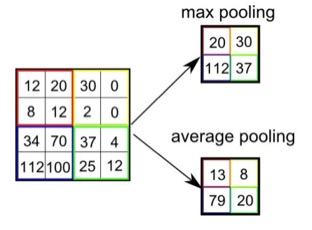  
  
완전 연결 레이어(Fully Connected Layer)  
• 3차원 구조의 activation map(H * W * C)의 모든 값을 일렬로 이어 붙임. flatten  
• 인식의 경우, 소프트맥스(softmax) 레이어를 추가하여 각 클래스에 대한 확률 값을 결과로 얻음  
  
  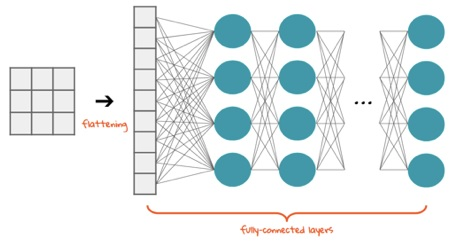  
  
  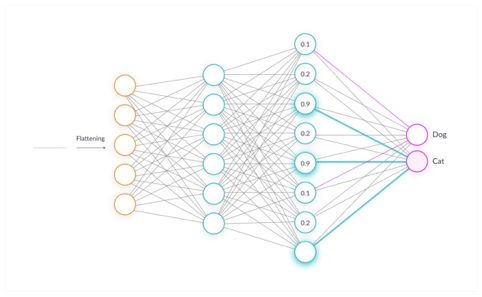

OpenCV DNN 모듈  
  
*  딥러닝 프레임워크	model 파일 확장자	     config 파일 확장자	framework 문자열  
               카페	  *.caffemodel	            *.prototxt	        "caffe"  
         텐서플로우	   *.pb	                     *.pbtxt	         "tensorflow"  
               토치	  *.t7 또는 *.net	 	                          "torch"  
             다크넷	 *.weights	               *.cfg	           "darknet"  
               DLDT	    *.bin	                  *.xml	              "dldt"  
               ONNX	    *.onnx	 	                                  "onnx"  
  
네트워크 불러오기  
cv2.dnn.readNet(model, config=None, framework=None) -> retval  

model: 훈련된 가중치를 저장하고 있는 이진 파일 이름  
config: 네트워크 구성을 저장하고 있는 텍스트 파일 이름  
framework: 명시적인 딥러닝 프레임워크 이름  
retval: cv2.dnn_Net 클래스 객체  
  
네트워크 입력 블롭(blob) 만들기  
cv2.dnn.blobFromImage(image, scalefactor=None, size=None, mean=None,
swapRB=None, crop=None, ddepth=None) -> retval  
  
image: 입력 영상  
scalefactor: 입력 영상 픽셀 값에 곱할 값. 기본값은 1  
=> 딥러닝 학습을 진행할 때 입력 영상을 0 ~ 255 픽셀값을 이용했는지, 0 ~ 1로 정규화해서 이용했는지에 맞게 지정해줘야 합니다. 0 ~ 1로 정규화하여 학습을 진행했으면 1/255를 입력  
size: 출력 영상의 크기. 학습할 때 사용한 영상의 크기. 기본값은 (0, 0)  
mean: 입력 영상 각 채널에서 뺄 평균 값. 학습할 때 mean 값을 빼서 계산한 경우 그와 동일한 mean 값. 기본값은 (0, 0, 0, 0)  
swapRB: R과 B 채널을 서로 바꿀 것인지를 결정하는 플래그. 기본값은 False  
crop: 크롭(crop) 수행 여부. 학습할 때 영상을 잘라서 학습하였으면 그와 동이하게 입력. 기본값은 False  
ddepth: 출력 블롭의 깊이. CV_32F 또는 CV_8U. 기본값은 CV_32F  
retval: 영상으로부터 구한 블롭 객체. numpy.ndarray. shape=(N,C,H,W). dtype=numpy.float32  (N,C,H,W: 개수, 채널, 세로, 가로)  
  
네트워크 입력 설정하기  
cv2.dnn_Net.setInput(blob, name=None, scalefactor=None, mean=None) -> None  
  
blob: 블롭 객체  
name: 입력 레이어 이름  
scalefactor: 추가적으로 픽셀 값에 곱할 값  
mean: 추가적으로 픽셀 값에서 뺄 평균 값  
  
네트워크 순방향 실행 (추론)  
cv2.dnn_Net.forward(outputName=None) -> retval  
cv2.dnn_Net.forward(outputNames=None, outputBlobs=None) -> outputBlobs  
  
outputName: 출력 레이어 이름  
retval: 지정한 레이어의 출력 블롭. 네트워크마다 다르게 결정됨  
outputNames: 출력 레이어 이름 리스트  
outputBlobs: 지정한 레이어의 출력 블롭 리스트  

<GoogLeNet 영상 인식>  
• 2014년 ILSVRC(ImageNet Large Scale Visual Recognition Competition) 영상 인식 분야 1위  
• 1000개의 카테고리, 120만개의 훈련 영상, 15만개의 테스트 영상  
• 입력: 224x224, BGR 컬러 영상, 평균 값 = (104, 117, 123)  
• 출력: 1x1000 행렬, 1000개 클래스에 대한 확률 값  

In [6]:
import sys
import numpy as np
import cv2


# 입력 영상 불러오기

filename = 'googlenet/beagle.jpg'

img = cv2.imread(filename)

if img is None:
    print('Image load failed!')
    sys.exit()

# 네트워크 불러오기

# Caffe
model = 'googlenet/bvlc_googlenet.caffemodel'
config = 'googlenet/deploy_proto.txt'

# ONNX
#model = 'googlenet/inception-v1-9.onnx'
#config = ''

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Network load failed!')
    sys.exit()

# 클래스 이름 불러오기

classNames = None
with open('googlenet/classification_classes_ILSVRC2012.txt', 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

# 추론

blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))
net.setInput(blob)
prob = net.forward()

# 추론 결과 확인 & 화면 출력

out = prob.flatten()
classId = np.argmax(out)
confidence = out[classId]

text = f'{classNames[classId]} ({confidence * 100:4.2f}%)'
cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


<OpenCV DNN 얼굴 검출>  
  
• OpenCV 예제에서 DNN 모듈을 사용한 얼굴 검출 기능을 지원  
• SSD(Single Shot MultiBox Detector) 기반 얼굴 검출 네트워크  
• 기존의 Haar-Cascade 방법보다 속도 & 정확도 면에서 더 좋은 성능을 나타냄  
• 동시대 다른 객체 검출 알고리즘과 비교하여 성능과 속도 두 가지를 모두 만족시킨 알고리즘  
Faster R-CNN: 73.2 mAP, 7 FPS  
YOLOv1: 63.4 mAP, 45 FPS  
➔ SSD: 74.3 mAP, 59 FPS  
  
OpenCV DNN 얼굴 검출(SSD) 입력  
• Size: (300, 300)  
• Scale: 1 (0 ~ 255)  
• Mean: (104, 177, 123)  
• RGB: false  
  
OpenCV DNN 얼굴 검출(SSD) 출력  
• out.shape=(1, 1, 200, 7)  
• detect = out[0, 0, :, :] => [0, 1, conf, x1, y1, x2, y2]  
  


In [5]:
import sys
import numpy as np
import cv2


model = 'dnn_face/res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = 'dnn_face/deploy_proto.txt'
#model = 'opencv_face_detector/opencv_face_detector_uint8.pb'
#config = 'opencv_face_detector/opencv_face_detector.pbtxt'

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Camera open failed!')
    sys.exit()

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Net open failed!')
    sys.exit()

while True:
    ret, frame = cap.read()

    if not ret:
        break

    blob = cv2.dnn.blobFromImage(frame, 1, (300, 300), (104, 177, 123))
    net.setInput(blob)
    out = net.forward()

    detect = out[0, 0, :, :]#[[n, 7]]. n:검출개수, 7[0,1,확률, x1, y1, x2, y2] 
    (h, w) = frame.shape[:2]

    for i in range(detect.shape[0]):
        confidence = detect[i, 2]
        if confidence < 0.5:
            break

        x1 = int(detect[i, 3] * w)
        y1 = int(detect[i, 4] * h)
        x2 = int(detect[i, 5] * w)
        y2 = int(detect[i, 6] * h)

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0))

        label = f'Face: {confidence:4.2f}'
        cv2.putText(frame, label, (x1, y1 - 1), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()
cap.release()

Camera open failed!


SystemExit: 

c:\users\clee0\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<YOLOv3 객체 검출>  
YOLO란?  
• You Only Look Once  
• 실시간 객체 검출 딥러닝 알고리즘  
• YOLOv3: 2018년 4월 발표된 Tech Report  
• 기존 객체 검출 방법과 성능은 비슷하고 속도는 훨씬 빠름  
• COCO 데이터셋 사용  
• 80개 클래스 객체 검출  
  
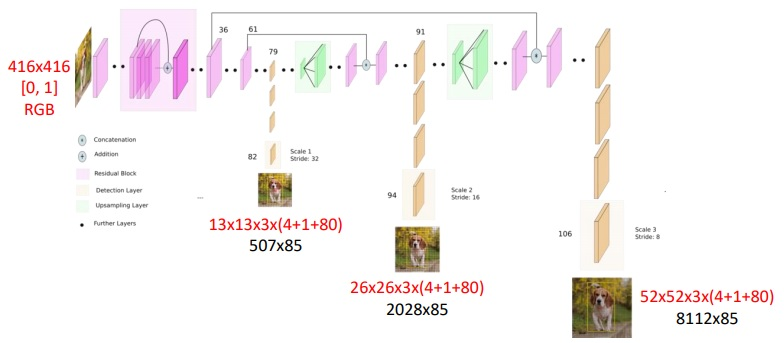  
  
YOLOv3 입력  
• Size: (320, 320), (416, 416), (608, 608)  
• Scale: 0.00392 (1/255.)  
• Mean: [0, 0, 0]  
• RGB: true  
  
YOLOv3 출력  
=> 3개의 출력 레이어  
• outs[0].shape=(507, 85), 507 = 13 * 13 * 3  
• outs[1].shape=(2028, 85), 2028 = 26 * 26 * 3  
• outs[2].shape=(8112, 85), 8112 = 52 * 52 * 3  
=> 각 출력의 깊이 85: [x, y, w, h, 객체점수, classId_1일 점수, classId_2일 점수, ..., classId_80일 점수]  

In [4]:
import sys
import numpy as np
import cv2


# 모델 & 설정 파일
model = 'yolo/yolov3.weights'
config = 'yolo/yolov3.cfg'
class_labels = 'yolo/coco.names'
confThreshold = 0.5
nmsThreshold = 0.4

# 테스트 이미지 파일
img_files = ['yolo/dog.jpg', 'yolo/person.jpg', 'yolo/sheep.jpg', 'yolo/kite.jpg', 'img/mycats2.jpg']

# 네트워크 생성
net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Net open failed!')
    sys.exit()

# 클래스 이름 불러오기

classes = []
with open(class_labels, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

colors = np.random.uniform(0, 255, size=(len(classes), 3))#클래스별 색상 

# 출력 레이어 이름 받아오기

layer_names = net.getLayerNames()

#net.getUnconnectedOutLayers(): 연결되지 않은 출력 레이어의 인덱스를 리스트에 담아 반환
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
# output_layers = ['yolo_82', 'yolo_94', 'yolo_106']

# 실행

for f in img_files:
    img = cv2.imread(f)

    if img is None:
        continue

    # 블롭 생성 & 추론
    blob = cv2.dnn.blobFromImage(img, 1/255., (320, 320), swapRB=True)
    net.setInput(blob)
    outs = net.forward(output_layers)
    
    # outs는 3개의 ndarray 리스트.
    # outs[0].shape=(507, 85), 13*13*3=507
    # outs[1].shape=(2028, 85), 26*26*3=2028
    # outs[2].shape=(8112, 85), 52*52*3=8112
    
    h, w = img.shape[:2]

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            # detection: 4(bounding box) + 1(objectness_score) + 80(class confidence)
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > confThreshold:
                # 바운딩 박스 중심 좌표 & 박스 크기
                cx = int(detection[0] * w)
                cy = int(detection[1] * h)
                bw = int(detection[2] * w)
                bh = int(detection[3] * h)

                # 바운딩 박스 좌상단 좌표
                sx = int(cx - bw / 2)
                sy = int(cy - bh / 2)

                boxes.append([sx, sy, bw, bh])
                confidences.append(float(confidence))
                class_ids.append(int(class_id))

    # 비최대 억제. 40% 이상 겹치는 바운딩 박스에 대해 최대 confidence (>0.5) 바운딩 박스만 선별.
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)

    for i in indices:
        i = i[0]
        sx, sy, bw, bh = boxes[i]
        label = f'{classes[class_ids[i]]}: {confidences[i]:.2}'  # 확률
        color = colors[class_ids[i]] # 선 색깔
        cv2.rectangle(img, (sx, sy, bw, bh), color, 2)  # 박스 그리기
        cv2.putText(img, label, (sx, sy - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2, cv2.LINE_AA)

    t, _ = net.getPerfProfile()
    label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
    cv2.putText(img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow('img', img)
    cv2.waitKey()

cv2.destroyAllWindows()


<Mask-RCNN 영역 분할>  
영역 분할이란?  
• 객체의 바운딩 박스뿐만 아니라 픽셀 단위 클래스 분류까지 → 객체의 윤곽 구분  
• Semantic segmentation: 하나의 클래스는 모두 같은 레이블  
• Instance segmentation: 객체 단위 다른 레이블  
  
Mask-RCNN이란?  
• 대표적인 객체 영역 분할 딥러닝 알고리즘   
• Faster R-CNN (object detection) + FCN (semantic segmentation)  
Faster R-CNN (객체 검출) -> 바운딩 박스 정보  
FCN (객체 단위 클래스 분류) -> 객체 단위 마스크 맵  
  
Mask-RCNN 입력  
• Size: 임의의 크기 (auto resize)  
• Scale: 1 (1 ~ 255)  
• Mean: [0, 0, 0]  
• RGB: true  
  
Mask-RCNN 출력  
• 2개의 출력 레이어 사용  
'detection_out_final' → boxes: boxes.shape=(1, 1, 100, 7)  
'detection_masks' → masks: masks.shape=(100, 90, 15, 15)  
  
boxes[:,:,:,7] => [0, classId, conf, x1, y1, x2, y2]  
결과 좌표는 축소되었으므로 원래 크기로 확대 해야함. 

In [2]:
import sys
import numpy as np
import cv2


def drawBox(img, classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv2.rectangle(img, (left, top), (right, bottom), colors[classId], 2)

    label = f'{classes[classId]}: {conf:.2f}'

    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
    top = max(top, labelSize[1])
    cv2.rectangle(img, (left - 1, top - labelSize[1] - baseLine),
                  (left + labelSize[0], top), colors[classId], -1)
    cv2.putText(img, label, (left, top - baseLine), cv2.FONT_HERSHEY_SIMPLEX,
                0.6, (0, 0, 0), 1, cv2.LINE_AA)


# 모델 & 설정 파일
model = 'mask_rcnn/frozen_inference_graph.pb'
config = 'mask_rcnn/mask_rcnn_inception_v2_coco_2018_01_28_pb.txt'
class_labels = 'mask_rcnn/coco_90.names'
confThreshold = 0.6
maskThreshold = 0.3

# 테스트 이미지 파일
img_files = ['mask_rcnn/dog.jpg', 'mask_rcnn/traffic.jpg', 'mask_rcnn/sheep.jpg']

# 네트워크 생성
net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Net open failed!')
    sys.exit()

# 클래스 이름 불러오기

classes = []
with open(class_labels, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

colors = np.random.uniform(0, 255, size=(len(classes), 3))

# 실행
for f in img_files:
    img = cv2.imread(f)

    if img is None:
        continue

    # 블롭 생성 & 추론
    blob = cv2.dnn.blobFromImage(img, swapRB=True)
    net.setInput(blob)
    boxes, masks = net.forward(['detection_out_final', 'detection_masks'])

    # boxes.shape=(1, 1, 100, 7)   #객체 추출 정보
    # masks.shape=(100, 90, 15, 15) #객체 영역 정보

    h, w = img.shape[:2]
    numClasses = masks.shape[1]  # 90. 클래스 종류
    numDetections = boxes.shape[2]  # 100 검출 박스 개수

    boxesToDraw = []
    for i in range(numDetections):
        box = boxes[0, 0, i]  # box.shape=(7,)  [0, classId, conf, x1, y1, x2, y2]
        mask = masks[i]  # mask.shape=(90, 15, 15)
        score = box[2]
        if score > confThreshold:
            classId = int(box[1])
            #print(classId, classes[classId], score)

            x1 = int(w * box[3])
            y1 = int(h * box[4])
            x2 = int(w * box[5])
            y2 = int(h * box[6])

            boxesToDraw.append([img, classId, score, x1, y1, x2, y2])
            classMask = mask[classId]

            # 객체별 15x15 마스크를 바운딩 박스 크기로 resize한 후, 불투명 컬러로 표시
            classMask = cv2.resize(classMask, (x2 - x1 + 1, y2 - y1 + 1))
            mask = (classMask > maskThreshold)

            roi = img[y1:y2+1, x1:x2+1][mask]
            img[y1:y2+1, x1:x2+1][mask] = (0.7 * colors[classId] + 0.3 * roi).astype(np.uint8)

    # 객체별 바운딩 박스 그리기 & 클래스 이름 표시
    for box in boxesToDraw:
        drawBox(*box)

    t, _ = net.getPerfProfile()
    label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
    cv2.putText(img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow('img', img)
    cv2.waitKey()

cv2.destroyAllWindows()


<OpenPose: 포즈 인식>  
OpenPose란?  
• 카네기 멜론 대학에서 만든 딥러닝 기반 동작 인식 라이브러리  
• OpenPose represents the first real-time multi-person system to jointly detect human body, hand, facial, and foot keypoints (in total 135 keypoints) on single images.  
  
OpenPose 네트워크 구조  
• F: Feature map. 키 포인트 추출  
• L: Set of 2D vector fields of part affinity. 각 부분의 연관성 추출  
• S: Set of 2D confidence maps of body part locations. 바디 부분별 포인트 확률 계산  
  
OpenPose 학습 데이터셋: COCO (18 parts)  
  
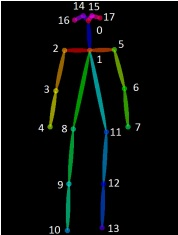  
  
0: 코  
1: 목  
2: 오른쪽 어깨  
3: 오른쪽 팔꿈치  
4: 오른쪽 손목  
5: 왼쪽 어깨  
6: 왼쪽 팔꿈치  
7: 왼쪽 손목  
8: 오른쪽 엉덩이  
9: 오른쪽 무릎  
10: 오른쪽 발목  
11: 왼쪽 엉덩이  
12: 왼쪽 무릎  
13: 왼쪽 발목  
14: 오른쪽 눈  
15: 왼쪽 눈  
16: 오른쪽 귀  
17: 왼쪽 귀  
18: 배경  
  
OpenPose 입력  
• Size: (368, 368)  
• Scale: 0.00392 (1/255.)  
• Mean: [0, 0, 0]  
• RGB: false  
  
OpenPose 출력 (COCO)  
• out.shape=(1, 57, 46, 46)  
• 57 = 18 keypoint confidence Maps  
       + 1 background  
       + 19 * 2 Part Affinity Maps  


In [2]:
import sys
import numpy as np
import cv2


# 모델 & 설정 파일
model = 'openpose/pose_iter_440000.caffemodel'
config = 'openpose/pose_deploy_linevec_proto.txt'

# 포즈 점 개수, 점 연결 개수, 연결 점 번호 쌍
nparts = 18
npairs = 17
pose_pairs = [(1, 2), (2, 3), (3, 4),  # 왼팔
              (1, 5), (5, 6), (6, 7),  # 오른팔
              (1, 8), (8, 9), (9, 10),  # 왼쪽다리
              (1, 11), (11, 12), (12, 13),  # 오른쪽다리
              (1, 0), (0, 14), (14, 16), (0, 15), (15, 17)]  # 얼굴

# 테스트 이미지 파일
img_files = ['openpose/pose1.jpg', 'openpose/pose2.jpg', 'openpose/pose3.jpg']

# 네트워크 생성
net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Net open failed!')
    sys.exit()

for f in img_files:
    img = cv2.imread(f)

    if img is None:
        continue

    # 블롭 생성 & 추론
    blob = cv2.dnn.blobFromImage(img, 1/255., (368, 368))
    net.setInput(blob)
    out = net.forward()  # out.shape=(1, 57, 46, 46)

    h, w = img.shape[:2]

    # 검출된 점 추출
    points = []
    for i in range(nparts):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv2.minMaxLoc(heatMap)
        x = int(w * point[0] / out.shape[3])
        y = int(h * point[1] / out.shape[2])

        points.append((x, y) if conf > 0.1 else None)  # heat map threshold=0.1

    # 검출 결과 영상 만들기
    for pair in pose_pairs:
        p1 = points[pair[0]]
        p2 = points[pair[1]]

        if p1 is None or p2 is None:
            continue

        cv2.line(img, p1, p2, (0, 255, 0), 3, cv2.LINE_AA)
        cv2.circle(img, p1, 4, (0, 0, 255), -1, cv2.LINE_AA)
        cv2.circle(img, p2, 4, (0, 0, 255), -1, cv2.LINE_AA)

    # 추론 시간 출력
    t, _ = net.getPerfProfile()
    label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
    cv2.putText(img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow('img', img)
    cv2.waitKey()

cv2.destroyAllWindows()


<EAST: 문자 영역 검출  >  
  
EAST란?  
• "EAST: An Efficient and Accurate Scene Text Detector"  
• Multi-oriented word box detection  
  
EAST 입력  
• Size: (320, 320), etc  
• Scale: 1 (0 ~ 255)  
• Mean: [123.68, 116.78, 103.94]  
• RGB: false  
  
EAST 출력  
• 두 개의 출력 레이어  
'feature_fusion/concat_3' 레이어 ➔ Text quadrangle 정보 (RBOX)  
'feature_fusion/Conv_7/Sigmoid' 레이어 ➔ Score 정보  

In [3]:
import sys
import math
import numpy as np
import cv2


def decode(scores, geometry, scoreThreshold):
    detections = []
    confidences = []

    # geometry.shape=(1, 5, 80, 80)
    # scores.shape=(1, 1, 80, 80)

    height = scores.shape[2]
    width = scores.shape[3]

    for y in range(0, height):
        # Extract data from scores
        scoresData = scores[0][0][y]
        x0_data = geometry[0][0][y]
        x1_data = geometry[0][1][y]
        x2_data = geometry[0][2][y]
        x3_data = geometry[0][3][y]
        anglesData = geometry[0][4][y]

        for x in range(0, width):
            score = scoresData[x]

            if(score < scoreThreshold):
                continue

            # feature map은 320x320 블롭의 1/4 크기이므로, 다시 4배 확대
            offsetX = x * 4.0
            offsetY = y * 4.0
            angle = anglesData[x]

            # (offsetX, offsetY) 위치에서 회전된 사각형 정보 추출
            cosA = math.cos(angle)
            sinA = math.sin(angle)
            h = x0_data[x] + x2_data[x]
            w = x1_data[x] + x3_data[x]

            # 회전된 사각형의 한쪽 모서리 점 좌표 계산
            offset = ([offsetX + cosA * x1_data[x] + sinA * x2_data[x],
                       offsetY - sinA * x1_data[x] + cosA * x2_data[x]])

            # 회전된 사각형의 대각선에 위치한 두 모서리 점 좌표 계산
            p1 = (-sinA * h + offset[0], -cosA * h + offset[1])
            p3 = (-cosA * w + offset[0],  sinA * w + offset[1])
            center = ((p1[0]+p3[0])/2, (p1[1]+p3[1])/2)

            detections.append((center, (w, h), -1*angle * 180.0 / math.pi))
            confidences.append(float(score))

    return [detections, confidences]


# 모델 & 설정 파일
model = 'east/frozen_east_text_detection.pb'
confThreshold = 0.5
nmsThreshold = 0.4

# 테스트 이미지 파일
img_files = ['east/road_closed.jpg', 'east/patient.jpg', 'east/copy_center.jpg']

# 네트워크 생성
net = cv2.dnn.readNet(model)

if net.empty():
    print('Net open failed!')
    sys.exit()

# 실행
for f in img_files:
    img = cv2.imread(f)

    if img is None:
        continue

    # 블롭 생성 & 추론
    blob = cv2.dnn.blobFromImage(img, 1, (320, 320), (123.68, 116.78, 103.94), True)
    net.setInput(blob)
    scores, geometry = net.forward(['feature_fusion/Conv_7/Sigmoid', 'feature_fusion/concat_3'])

    # scores.shape=(1, 1, 80, 80)
    # geometry.shape=(1, 5, 80, 80)

    # score가 confThreshold보다 큰 RBOX 정보를 RotatedRect 형식으로 변환하여 반환
    [boxes, confidences] = decode(scores, geometry, confThreshold)

    # 회전된 사각형에 대한 비최대 억제
    indices = cv2.dnn.NMSBoxesRotated(boxes, confidences, confThreshold, nmsThreshold)

    rw = img.shape[1] / 320
    rh = img.shape[0] / 320

    for i in indices:
        # 회전된 사각형의 네 모서리 점 좌표 계산 & 표시
        vertices = cv2.boxPoints(boxes[i[0]])

        for j in range(4):
            vertices[j][0] *= rw
            vertices[j][1] *= rh

        for j in range(4):
            p1 = (vertices[j][0], vertices[j][1])
            p2 = (vertices[(j + 1) % 4][0], vertices[(j + 1) % 4][1])
            cv2.line(img, p1, p2, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('img', img)
    cv2.waitKey()

cv2.destroyAllWindows()


error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
